Read data and import necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    zero_one_loss, 
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report,
    precision_score,
    recall_score
)

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel("C:/Users/DELL/Desktop/titanic.csv")
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
data.shape

(1309, 14)

 find missing value ,fill or drop

In [5]:
data.isnull().sum()             #find null values

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [6]:
data=data.drop(["cabin","body","home.dest","name","ticket","boat"], axis=1)     #drop useless variables
data

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,C
1305,3,0,female,NaN,1,0,14.4542,C
1306,3,0,male,26.5000,0,0,7.2250,C
1307,3,0,male,27.0000,0,0,7.2250,C


In [7]:
suv=data["survived"]
data=data.drop(["survived"],axis =1)

In [8]:
data=pd.concat([data,suv],axis=1)
data

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0
3,1,male,30.0000,1,2,151.5500,S,0
4,1,female,25.0000,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C,0
1305,3,female,NaN,1,0,14.4542,C,0
1306,3,male,26.5000,0,0,7.2250,C,0
1307,3,male,27.0000,0,0,7.2250,C,0


In [9]:
data.age.value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: age, Length: 98, dtype: int64

In [11]:
data.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    2
survived    0
dtype: int64

In [12]:
data.fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
9.6875      1
15.5792     1
12.0000     1
7.8750      1
Name: fare, Length: 281, dtype: int64

In [14]:
data.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
survived    0
dtype: int64

In [15]:
data.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [17]:
data.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

# label encoding for categorical variable 

In [18]:
data.dtypes

pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
survived      int64
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.sex=le.fit_transform(data.sex)
data.embarked=le.fit_transform(data.embarked)

In [20]:
data.dtypes

pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
survived      int64
dtype: object

In [21]:
data.head(5)

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,0,29.0000,0,0,211.3375,2,1
1,1,1,0.9167,1,2,151.5500,2,1
2,1,0,2.0000,1,2,151.5500,2,0
3,1,1,30.0000,1,2,151.5500,2,0
4,1,0,25.0000,1,2,151.5500,2,0


# data visualization

<AxesSubplot:>

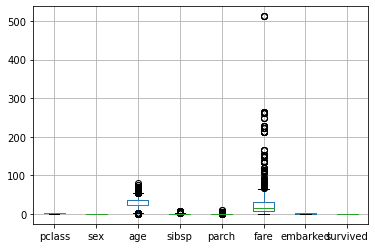

In [22]:
data.boxplot()

<AxesSubplot:xlabel='fare', ylabel='Density'>

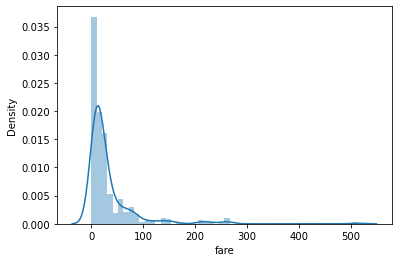

In [27]:
sns.distplot(data.fare)

(array([1071.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

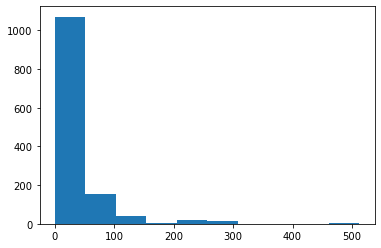

In [29]:
plt.hist(data.fare)

In [35]:
#here graph are positively skewed so we use iqr method for trating outliers
iqr=data.fare.quantile(0.75)-data.fare.quantile(0.25)
iqr

23.379199999999997

In [41]:
ub=data.fare.quantile(0.75)+3*iqr
lb=data.fare.quantile(0.25)-3*iqr
print(lb,ub)

-62.24179999999999 101.4126


<AxesSubplot:>

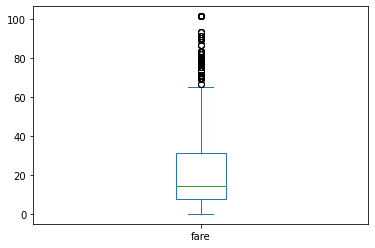

In [44]:
data.loc[data["fare"]>101.4126,"fare"]=101.4126
data.fare.plot(kind="box")

<AxesSubplot:xlabel='age', ylabel='Density'>

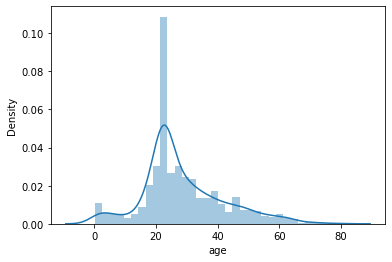

In [50]:
sns.distplot(data.age)

<AxesSubplot:xlabel='parch', ylabel='Density'>

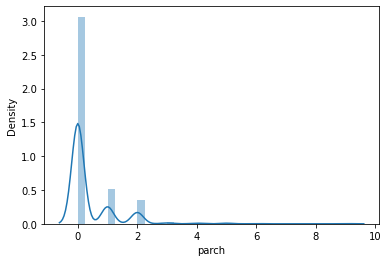

In [61]:
sns.distplot(data.parch)

In [63]:
#treating skewness for those varible which are shows outliers
data.skew()     #-1 to 1 is better to skewness

pclass     -0.598647
sex        -0.602189
age         0.675491
sibsp       3.844220
parch       3.669078
fare        1.564028
embarked   -1.123069
survived    0.486404
dtype: float64

In [64]:
data.loc[data["fare"]==0]

,pclass,sex,age,sibsp,parch,fare,embarked,survived
7,1,1,39.0,0,0,0.0,2,0
70,1,1,22.5,0,0,0.0,2,0
125,1,1,22.5,0,0,0.0,2,0
150,1,1,40.0,0,0,0.0,2,0
170,1,1,49.0,0,0,0.0,2,1
223,1,1,22.5,0,0,0.0,2,0
234,1,1,38.0,0,0,0.0,2,0
363,2,1,22.5,0,0,0.0,2,0
384,2,1,22.5,0,0,0.0,2,0
410,2,1,22.5,0,0,0.0,2,0


In [65]:
v=np.sqrt(data.fare)

In [66]:
v.skew()    #now it is lies betn -1 to 1

0.9889060307770994

In [67]:
data.sibsp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

In [68]:
data.shape

(1309, 8)

Interpretaion:We successfully deal with outlier without loosing shape and information

# survived distribution

<AxesSubplot:xlabel='survived', ylabel='count'>

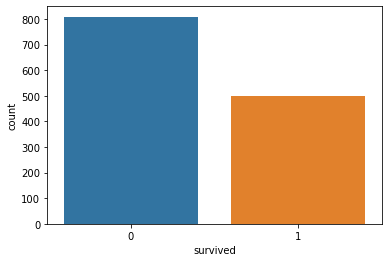

In [72]:
sns.countplot(data.survived)

INTERPRETATION:The count of survived(1) passenger is less i.e only nearly 500 passenger survived out of 1309 in titanic incident

# SURVIVED BY AGE

Text(0.5, 1.0, 'survivence presence with age')

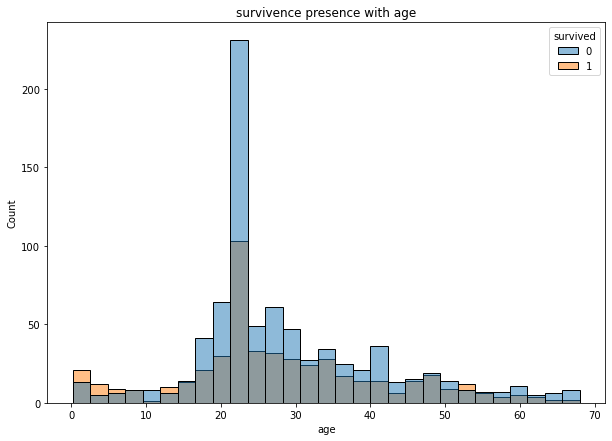

In [74]:
plt.figure(figsize=(10,7))
sns.histplot(data = data, x = 'age', hue='survived')
plt.title("survivence presence with age")

INTERPRETATION:dark blue: count of passenger with that perticular age
light blue: passenger who not survived
yellow: peaople who survived
 Interpretation:In the titanic incident passenger whose age between 1 to 15 (kids) and age between 48 to 55(old,adults) are survived only .

INTERPRETATION:As per above data the count of Females survived more than count of male survived ie.most of female survived in that titanic

# SURVIVED ACCORDING TO NO.OF SIBLINGS COUNT

Text(0.5, 1.0, 'passenger survived v/s sibsp')

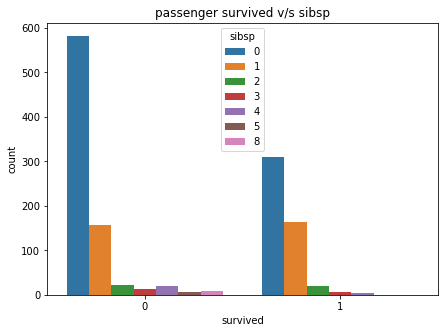

In [76]:
plt.figure(figsize=(7,5))
sns.countplot(data = data, x = 'survived', hue = 'sibsp')
plt.title("passenger survived v/s sibsp")

INTERPRETATION:the above graph shows the relation between the no.of siblings the passenger have verses how many of them survived
according to graph the the passenger who survived(1) the count of single child is more as compares to passengers havings siblings. 

# SURVIVED BY TICKET CLASS

Text(0.5, 1.0, 'passenger survived v/s pclass')

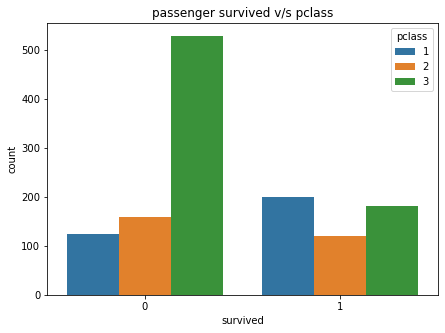

In [77]:
plt.figure(figsize=(7,5))
sns.countplot(data = data, x = 'survived', hue = 'pclass')
plt.title("passenger survived v/s pclass")

INTERPRETATION:from the above data the passenger who survived(1) are mostly belongs to class 1 which showing blue bar in graph

# scatter plot

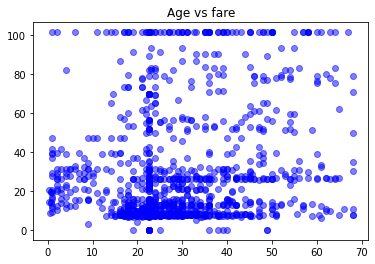

In [220]:
plt.scatter(data['age'],data['fare'],color='blue',alpha=0.5)
plt.xlable=('Age')
plt.ylable=('fare')
plt.title("Age vs fare")
plt.show()

# pie chart

Text(0.5, 1.0, 'pie chart of passenger by Gender')

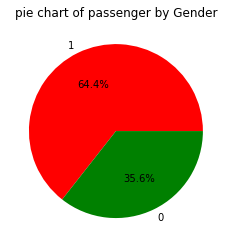

In [222]:
Gender_count=data['sex'].value_counts()
plt.pie(Gender_count,labels=Gender_count.index,autopct='%1.1f%%',colors=["red",'green'])
plt.title('pie chart of passenger by Gender')

# machine learning

In [79]:
data

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,0,29.0000,0,0,101.4126,2,1
1,1,1,0.9167,1,2,101.4126,2,1
2,1,0,2.0000,1,2,101.4126,2,0
3,1,1,30.0000,1,2,101.4126,2,0
4,1,0,25.0000,1,2,101.4126,2,0
...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,0,0
1305,3,0,22.5000,1,0,14.4542,0,0
1306,3,1,26.5000,0,0,7.2250,0,0
1307,3,1,27.0000,0,0,7.2250,0,0


In [80]:
x=data.drop(["survived"],axis=1) #dependent ,regressor
x

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,29.0000,0,0,101.4126,2
1,1,1,0.9167,1,2,101.4126,2
2,1,0,2.0000,1,2,101.4126,2
3,1,1,30.0000,1,2,101.4126,2
4,1,0,25.0000,1,2,101.4126,2
...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,0
1305,3,0,22.5000,1,0,14.4542,0
1306,3,1,26.5000,0,0,7.2250,0
1307,3,1,27.0000,0,0,7.2250,0


In [82]:
y=data["survived"]    #response ,target
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

# split data 20% for test and 80% to train

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [85]:
#x_train
#x_test

In [153]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1047, 7), (262, 7), (1047,), (262,))

# 1.logistic regression

In [154]:
from sklearn.linear_model import LogisticRegression 

In [155]:
lg=LogisticRegression()

In [156]:
lg.fit(x_train,y_train)

LogisticRegression()

In [157]:
lg_p=lg.predict(x_test)
lg_p

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [158]:
from sklearn.metrics import confusion_matrix

In [159]:
cm=confusion_matrix(lg_p,y_test)
cm

array([[136,  31],
       [ 31,  64]], dtype=int64)

In [160]:
#accuracy :how often model predict correct output
#its ratio of how model is correct prediction made by classifier to the Number of PREDICTION MADE BY CLASSIFIER 
#C.P/T.P

In [161]:
lg_acc=(cm.diagonal().sum()/cm.sum())*100
lg_acc

76.33587786259542

In [162]:
lg_pr=precision_score(lg_p,y_test)      #exact clasified
lg_pr

0.6736842105263158

In [163]:
lg_re=recall_score(lg_p,y_test)          #complete classified
lg_re

0.6736842105263158

In [164]:
from sklearn.metrics import classification_report
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       167
           1       0.67      0.67      0.67        95

    accuracy                           0.76       262
   macro avg       0.74      0.74      0.74       262
weighted avg       0.76      0.76      0.76       262



In [165]:
#there is a 76% accuracy

# 2.decision tree

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [167]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [168]:
dt_p=dt.predict(x_test)

In [169]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[136,  27],
       [ 31,  68]], dtype=int64)

In [170]:
dt_ac=(dt_cf.diagonal().sum()/dt_cf.sum())*100
dt_ac

77.86259541984732

In [171]:
dt_pr=precision_score(dt_p,y_test)      #exact clasified
dt_pr

0.7157894736842105

In [172]:
dt_re=recall_score(dt_p,y_test)      #exact clasified
dt_re

0.6868686868686869

In [173]:
from sklearn.metrics import classification_report
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       163
           1       0.72      0.69      0.70        99

    accuracy                           0.78       262
   macro avg       0.77      0.76      0.76       262
weighted avg       0.78      0.78      0.78       262



In [174]:
#show 78% accuracy

# feature selection:-it is part of decision tree

In [175]:
dt.feature_importances_

array([0.0917387 , 0.32542656, 0.21775077, 0.05722713, 0.03650685,
       0.25439523, 0.01695477])

In [176]:
dt_df=pd.DataFrame({"Importance":list(dt.feature_importances_),"columns":list(x)})
dt_df

,Importance,columns
0,0.091739,pclass
1,0.325427,sex
2,0.217751,age
3,0.057227,sibsp
4,0.036507,parch
5,0.254395,fare
6,0.016955,embarked


# 3.Random forest

In [177]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [178]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [179]:
rf_p=rf.predict(x_test)

In [180]:
cf=confusion_matrix(rf_p,y_test)
cf

array([[141,  22],
       [ 26,  73]], dtype=int64)

In [181]:
rf_acc=cf.diagonal().sum()/cf.sum()*100
rf_acc

81.67938931297711

In [182]:
rf_pr=precision_score(rf_p,y_test)
rf_pr

0.7684210526315789

In [183]:
rf_re=recall_score(rf_p,y_test)
rf_re

0.7373737373737373

In [184]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       163
           1       0.77      0.74      0.75        99

    accuracy                           0.82       262
   macro avg       0.81      0.80      0.80       262
weighted avg       0.82      0.82      0.82       262



In [185]:
#it show 81% accuracy

# 4.KNN

In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=24)

In [187]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [188]:
k_p=knn.predict(x_test)

In [189]:
ck=confusion_matrix(k_p,y_test)
ck

array([[143,  51],
       [ 24,  44]], dtype=int64)

In [190]:
kacc=ck.diagonal().sum()/ck.sum()*100
kacc

71.37404580152672

In [191]:
k_pr=precision_score(k_p,y_test)
k_pr

0.4631578947368421

In [192]:
k_re=recall_score(k_p,y_test)
k_re

0.6470588235294118

In [193]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       194
           1       0.46      0.65      0.54        68

    accuracy                           0.71       262
   macro avg       0.66      0.69      0.67       262
weighted avg       0.75      0.71      0.73       262



In [194]:
# it show 71% accuracy

# 5. SVM 

In [195]:
from sklearn.svm import SVC
svc=SVC()

In [196]:
svc.fit(x_train,y_train)

SVC()

In [197]:
s_p=svc.predict(x_test)
s_p

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [198]:
cs=confusion_matrix(s_p,y_test)
cs

array([[145,  56],
       [ 22,  39]], dtype=int64)

In [199]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

70.22900763358778

In [200]:
s_pr=precision_score(s_p,y_test)
s_pr

0.4105263157894737

In [201]:
s_re=recall_score(s_p,y_test)
s_re

0.639344262295082

In [202]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       201
           1       0.41      0.64      0.50        61

    accuracy                           0.70       262
   macro avg       0.64      0.68      0.64       262
weighted avg       0.76      0.70      0.72       262



# 6.gaussian Navie bays 

In [203]:
from sklearn.naive_bayes import GaussianNB

In [204]:
nb = GaussianNB()

In [205]:
nb_f=nb.fit(x_train,y_train)

In [206]:
nb_p=nb.predict(x_test)

In [207]:
cf=confusion_matrix(nb_p,y_test)
cf

array([[128,  28],
       [ 39,  67]], dtype=int64)

In [208]:
acc_nb=(cf.diagonal().sum()/cf.sum())*100
acc_nb

74.42748091603053

In [209]:
pre_nb=precision_score(nb_p,y_test)
pre_nb

0.7052631578947368

In [210]:
re_nb=recall_score(nb_p,y_test)
re_nb

0.6320754716981132

In [211]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       156
           1       0.71      0.63      0.67       106

    accuracy                           0.74       262
   macro avg       0.74      0.73      0.73       262
weighted avg       0.74      0.74      0.74       262



In [212]:
#it show 74% accuracy

# MAKE DATAFRAME FOR COMPARE RESULT

In [216]:
list1=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","KNN","SVM","Guassian naeive bays"]
list2=[lg_acc,dt_ac,rf_acc,kacc,acc_s,acc_nb]
list3=[lg_pr,dt_pr,rf_pr,k_pr,s_pr,pre_nb]
list4=[lg_re,dt_re,rf_re,k_re,s_re,re_nb]



In [217]:
df1=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4})
df1

,Model Name,Accuracy,Precision,Recall
0,LOGISTIC REGRESSION,76.335878,0.673684,0.673684
1,DECISION TREE,77.862595,0.715789,0.686869
2,RANDOM FOREST,81.679389,0.768421,0.737374
3,KNN,71.374046,0.463158,0.647059
4,SVM,70.229008,0.410526,0.639344
5,Guassian naeive bays,74.427481,0.705263,0.632075


INTERPRETATION: Random forest showing 81% accuracy and 76% precision and 73%recall
    therefore random forest is best model we can used for titanic classification.

also after random forest decision tree showing 77.86% accuracy and 71.57% precision and 68.68% recall therefore decision tree is 2nd best model 